# Machine-Learning

## Überwachtes Lernen; Regressionsgerade ohne Bias

### Die Daten

![Schuhe](Bilder/Schuh.png "Schuhe")

###### Stell dir vor, du möchtest dir ein Paar neue Schuhe kaufen, hast aber keine Ahnung, welche Schuhgröße du hast.

In Europa gibt es Schuhgrößen, die *irgendwie* zwischen ungefähr 30 und 48 liegen. Aber was ist für dich die passende Größe?

Du kannst natürlich die Länge deines Fußes messen: ca. 26 cm vielleicht! Doch was hilft das?

Also machen wir doch einmal ein Experiment in deiner Klasse, also:
1. Eine Tabelle anlegen!
1. Jedes Kind soll seinen Schuh ausziehen;
2. die Fußlänge messen;
2. die Schuhgröße (am Schuh) ablesen;
2. die Daten in der Tabelle notieren.

Es könnte sich dabei vielleicht die folgende Tabelle ergeben:

Fusslaenge (in cm)| Schuhgroesse (EU-Norm)
:---: | :---:
27 | 42
27.5 | 43
23.5 | 37
21.5 | 34
23 | 36
28.5 | 44
24.5 | 38
24.4 | 37
28.6 | 44
28.4 | 43


Natürlich könntest du jetzt raten (oder klug interpolieren), um deine richtige Größe zu finden. Doch wir wollen ein Programm erstellen, das einen allgemeinen Zusammenhang zwischen den Tabellenspalten aus den Beispielen ***lernt***.

### Visualisieren

Dazu lassen wir die Daten (in einer Datei mit dem Namen **schuhe.txt** abgelegt) in ein Koordinatensystem eintragen:

In [1]:
# Das ist eine Bibliothek, mir der man Zeichnungen anfertigen kann
import matplotlib.pyplot as plt

# Das ist eine Bibliothek, mir der man Listen verwalten kann
import numpy as np


In [2]:
def zeigen_1(datname):
    x_left, x_right, y_left, y_right = 15, 30, 30, 50 # Grenzen der Koordinatenachsen

    plt.axis([x_left, x_right, y_left, y_right]) # Achsen zeichnen
    plt.xticks(fontsize=15) # Unterteilung der x-Achse
    plt.yticks(fontsize=15) # Unterteilung der y-Achse
    plt.xlabel("Fußlänge", fontsize=18) # Beschriftung der x-Achse
    plt.ylabel("Schuhgröße", fontsize=18) # Beschriftung der y-Achse

    # Die Datei wird eingelesen und die beiden Spalten als Listen in X und Y abgelegt. 
    # Die erste Zeile der Datei wird überlesen
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)

    plt.plot (X, Y, "r.") # die Daten werden als rote Punkte dargestellt
    plt.show() # Die Graphik wird angezeigt

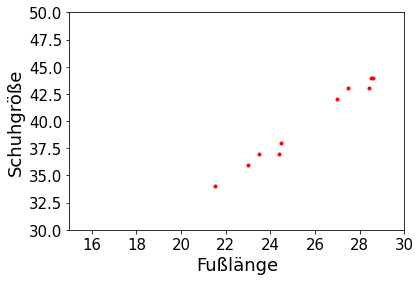

In [3]:
zeigen_1 ("schuhe.txt")

Man erkennt irgendwie einen Zusammenhang! Aber
1. Ist der Zusammenhang in einer Art *Formel* auszudrücken?
2. Und kann auch der Computer diesen Zusammenhang entdecken?

### Vorhersage; ein erster Versuch

Es scheint so, als ob ungefähr eine Gerade geeignet wäre, den Zusammenhang auszudrücken.

Also ein erster Versuch:
> Eine Gerade durch den Koordinatenursprung mit Steigung $m$ hat die Gradengleichung $y = m\cdot x$

Das können wir als Python-Funktion ausdrücken (dabei kann der Parameter X sogar eine ganze Liste von Zahlen sein):

In [4]:
def vorhersage (X, m):
    return X*m

Wir können ja den Wert von $m$ einmal raten und die Gerade anschießend einzeichnen (wir vergrößern dazu den Diagrammausschnitt so, dass der Koordinatenursprung sichtbar wird).

Probier doch mit dem Wert von $m$ ein wenig herum!

In [5]:
def zeigen_2 (datname, m):
    x_left, x_right, y_left, y_right = -1, 30, -1, 50 # Grenzen der Koordinatenachsen

    plt.axis([x_left, x_right, y_left, y_right]) # Achsen zeichnen
    plt.xticks(fontsize=15) # Unterteilung der x-Achse
    plt.yticks(fontsize=15) # Unterteilung der y-Achse
    plt.xlabel("Fußlänge", fontsize=18) # Beschriftung der x-Achse
    plt.ylabel("Schuhgröße", fontsize=18) # Beschriftung der y-Achse

    # Die Datei wird eingelesen und die beiden Spalten als Listen in X und Y abgelegt. 
    # Die erste Zeile der Datei wird überlesen
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)

    plt.plot (X, Y, "r.") # die Daten werden als rote Punkte dargestellt
    plt.plot ([0, x_right], [0, vorhersage(x_right, m)], linewidth=1.0, color="b")
    plt.show() # Die Graphik wird angezeigt

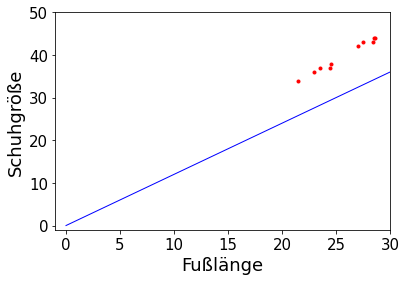

In [6]:
zeigen_2 ("schuhe.txt", 1.2)

### Fehler

Nehmen wir jetzt einmal an, wir haben für m einen Wert von 1.2 getestet. Das scheint nicht gut zu passen! Doch kann man denn irgendwie messen, wie groß der *Fehler* ist?

Der Fuß mit Länge 23.5 benutzte einen Schuh der Größe 37 (das ist die 3-te Zeile in der Tabelle). 

In [7]:
FUSS, SCHUH = np.loadtxt ("schuhe.txt", skiprows=1, unpack=True)

In [8]:
FUSS[2] # Achtung: die Indizes beginnen mit 0

23.5

In [9]:
SCHUH[2]

37.0

In [10]:
vorhersage (FUSS[2], 1.2)

28.2

Der Fehler ist also:

In [11]:
vorhersage (FUSS[2], 1.2) - SCHUH[2]

-8.8

Man kann sogar die Fehler aller Tabelleneinträge auflisten:

In [12]:
print (vorhersage (FUSS, 1.2) - SCHUH)

[ -9.6  -10.    -8.8   -8.2   -8.4   -9.8   -8.6   -7.72  -9.68  -8.92]


Alle Fehler könnten wir jetzt aufsummieren, um sozusagen den Gesamtfehler zu ermitteln:

In [13]:
sum (vorhersage (FUSS, 1.2) - SCHUH)

-89.72000000000001

Jedoch ist es dabei problematisch, den Fehler mit Hilfe der Differenz zu messen. Denn vielleicht sind einige der Fehler positiv, andere negativ, so dass sie sich irgendwie aufheben werden und wir so meinen, einen sehr kleinen Fehler zu machen.

Man könnte jetzt den Absolutwert der Differenz als Fehler benutzen, doch hat es sich als sinnvoll erwiesen, die Differenzen zu quadrieren (dann ergibt sich ja auch immer ein nicht-negativer Wert). 

Also machen wir alle Rechnungen erneut:

In [14]:
(vorhersage (FUSS[2], 1.2) - SCHUH[2])**2

77.44000000000001

In [15]:
print ((vorhersage (FUSS, 1.2) - SCHUH)**2)

[ 92.16   100.      77.44    67.24    70.56    96.04    73.96    59.5984
  93.7024  79.5664]


In [16]:
sum ((vorhersage (FUSS, 1.2) - SCHUH)**2)

810.2672000000003

Und statt der Summe aller Fehler könnten wir auch den Durchschnittlichen Fehler nutzen, um von der Anzahl der Tabelleneinträge unabhängig zu sein:

In [17]:
np.average ((vorhersage (FUSS, 1.2) - SCHUH)**2)

81.02672000000003

Das könnten wir in einer Python-Definition ausdrücken:

In [18]:
def fehler (X, Y, m):
    return np.average ((vorhersage (X, m) - Y)**2)

### Training

Die Idee besteht jetzt darin, den Wert von m so zu verändern, dass der Fehler möglichst gering wird. 

Dazu beginnt man mit einem willkürlichen Wert für m und verändert diesen Wert schrittweise nach oben bzw. unten, bis eine Veränderung keinen Fortschritt mehr bringt.

Man sagt dann, dass man ***trainiert***.

In [19]:
def training (X, Y, iterations, lr):
    m = 0
    for i in range(iterations):
        aktuellerFehler = fehler(X, Y, m)
        #print("w: %.3f =>Iteration: %4d => Loss: %.6f" % (m, i, current_loss))

        if fehler (X, Y, m + lr) < aktuellerFehler:
            m += lr
        elif fehler (X, Y, m - lr) < aktuellerFehler:
            m -= lr
    return m

In [20]:
training (FUSS, SCHUH, 1000, 0.01)

1.5500000000000012

In [21]:
#import seaborn as sns

In [22]:
#sns.set()

In [23]:
def zeigen_3 (datname, it, lr):
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)
    m = training (X, Y, it, lr)
    #sns.set()
    plt.plot(X, Y, "r.")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Fußlänge (F)", fontsize=30)
    plt.ylabel("Schuhgröße (S)", fontsize=30)
    x_left, x_right, y_left, y_right = 0, 30, 0, 50
    plt.axis([x_left, x_right, y_left, y_right])
    wert = vorhersage(x_right, m)
    plt.plot([0, x_right], [0, wert], linewidth=1.0, color="k")
    plt.show()
    print("Der Zusammenhang ist etwa S = %.3f * F" % m)


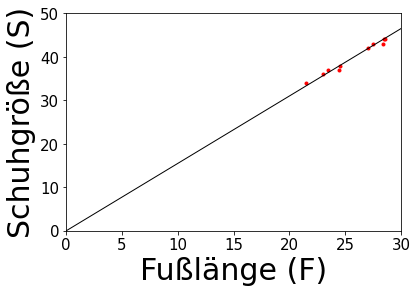

Der Zusammenhang ist etwa S = 1.550 * F


In [24]:
zeigen_3 ("schuhe.txt", 1000, 0.01)

### Wie geht es weiter?

In Wirklichkeit ist der vorhergesagte Wert ein wenig zu klein (das sieht man nicht so deutlich); in der Definition der europäischen Schuhgrößen muss man zu der Fußlänge noch einige Millimeter zufügen, damit der Fuß Platz hat, sich zu bewegen.

Aber das fällt ja hier kaum auf!

Doch es gibt auch Datenmengen, bei denen zwar eine Gerade als Vorhersage dient, die jedoch nicht durch den Koordinatenursprung verläuft. Das wird im folgenden Kapitel erörtert.
